<a href="https://colab.research.google.com/github/Sinem-B62/MPG-Project---MS/blob/main/Supervised_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning-Projekt: Klassifizierungsmodell (Supervised)**

Erstellung einer Vorhersage anhand eines Klassifizierungsmodels

#**1. Data Cleaning ✍**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vehicle_ML_Projekt.csv to vehicle_ML_Projekt.csv


In [ ]:
# Einlesen der Daten
df = pd.read_csv("vehicle_ML_Projekt.csv", sep=";")
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


**Überprüfung der Nullwerte zur Datenbereinigung**


In [ ]:

df.isnull().sum().sort_values(ascending=False)


,0
radius_ratio,6
skewness_about,6
circularity,5
scaled_radius_of_gyration.1,4
distance_circularity,4
scaled_variance,3
pr.axis_rectangularity,3
scaled_variance.1,2
scaled_radius_of_gyration,2
pr.axis_aspect_ratio,2


In [ ]:
df = df.dropna()

Erfolgreiche Entfernung aller Nullwerte; sämtliche Spalten sind nun frei von fehlenden Werten

In [ ]:
df.isnull().sum()

,0
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
pr.axis_aspect_ratio,0
max.length_aspect_ratio,0
scatter_ratio,0
elongatedness,0
pr.axis_rectangularity,0
max.length_rectangularity,0


In [ ]:
df.shape

(813, 19)

Auswahl aller Spalten mit dem Datentyp float

Iterative Verarbeitung: Jede Spalte wird einzeln in einer Schleife durchlaufen und entsprechend konvertiert

In [ ]:
float_cols = df.select_dtypes(include='float64').columns

for col in float_cols:
    df[col] = np.rint(df[col]).astype('Int64')

print(df.dtypes)


compactness                     int64
circularity                     Int64
distance_circularity            Int64
radius_ratio                    Int64
pr.axis_aspect_ratio            Int64
max.length_aspect_ratio         int64
scatter_ratio                   Int64
elongatedness                   Int64
pr.axis_rectangularity          Int64
max.length_rectangularity       int64
scaled_variance                 Int64
scaled_variance.1               Int64
scaled_radius_of_gyration       Int64
scaled_radius_of_gyration.1     Int64
skewness_about                  Int64
skewness_about.1                Int64
skewness_about.2                Int64
hollows_ratio                   int64
class                          object
dtype: object


/tmp/ipython-input-3282721442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.rint(df[col]).astype('Int64')


In [ ]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,car
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,car
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,car


#**2. Explorative Datenanalyse 💻**

Durchführung einer deskriptiven Analyse numerischer Daten

In [ ]:

df.describe().round(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.00,813.0,813.0,813.0,813.0,813.00,813.0,813.0,813.0,813.00,813.0,813.0,813.0,813.0,813.0,813.0,813.0,813.00
mean,93.66,44.8,82.04,169.1,61.77,8.60,168.56,40.99,20.56,147.89,188.38,438.38,174.25,72.4,6.35,12.69,188.98,195.73
std,8.23,6.15,15.78,33.62,7.97,4.68,33.08,7.8,2.57,14.50,31.17,175.27,32.33,7.48,4.92,8.93,6.15,7.40
min,73.00,33.0,40.0,104.0,47.0,2.00,112.0,26.0,17.0,118.00,130.0,184.0,109.0,59.0,0.0,0.0,176.0,181.00
25%,87.00,40.0,70.0,141.0,57.0,7.00,146.0,33.0,19.0,137.00,167.0,318.0,149.0,67.0,2.0,6.0,184.0,191.00
50%,93.00,44.0,79.0,167.0,61.0,8.00,157.0,43.0,20.0,146.00,179.0,364.0,173.0,71.0,6.0,11.0,189.0,197.00
75%,100.00,49.0,98.0,195.0,65.0,10.00,198.0,46.0,23.0,159.00,217.0,586.0,198.0,75.0,9.0,19.0,193.0,201.00
max,119.00,59.0,112.0,333.0,138.0,55.00,265.0,61.0,29.0,188.00,320.0,1018.0,268.0,135.0,22.0,41.0,206.0,211.00


#**3. Visualisierung der Daten 📊**

Auswahl sämtlicher numerischer Spalten (Datentypen int64 und float64)

Erstellung einer Abbildung mit einem 3x6-Achsenraster, das Platz für insgesamt 18 Diagramme bietet.

Iteration über alle numerischen Spalten und Visualisierung mittels Boxplots auf den jeweiligen Achsen, zur Vereinfachung wird das 2D-Achsenarray mit axes.flatten() abgeflacht.
Anpassung des Layouts zur Vermeidung von Überschneidungen sowie abschließende Ausgabe der Visualisierung

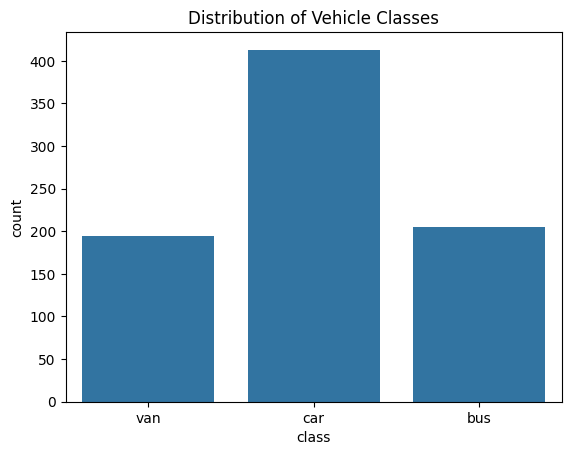

In [ ]:
sns.countplot(data=df, x='class')
plt.title('Distribution of Vehicle Classes')
plt.show()

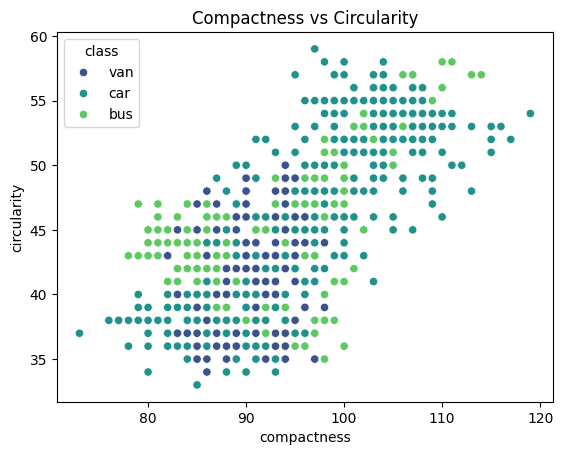

In [ ]:
sns.scatterplot(x='compactness', y='circularity', hue='class', data=df, palette='viridis')
plt.title('Compactness vs Circularity')
plt.show()

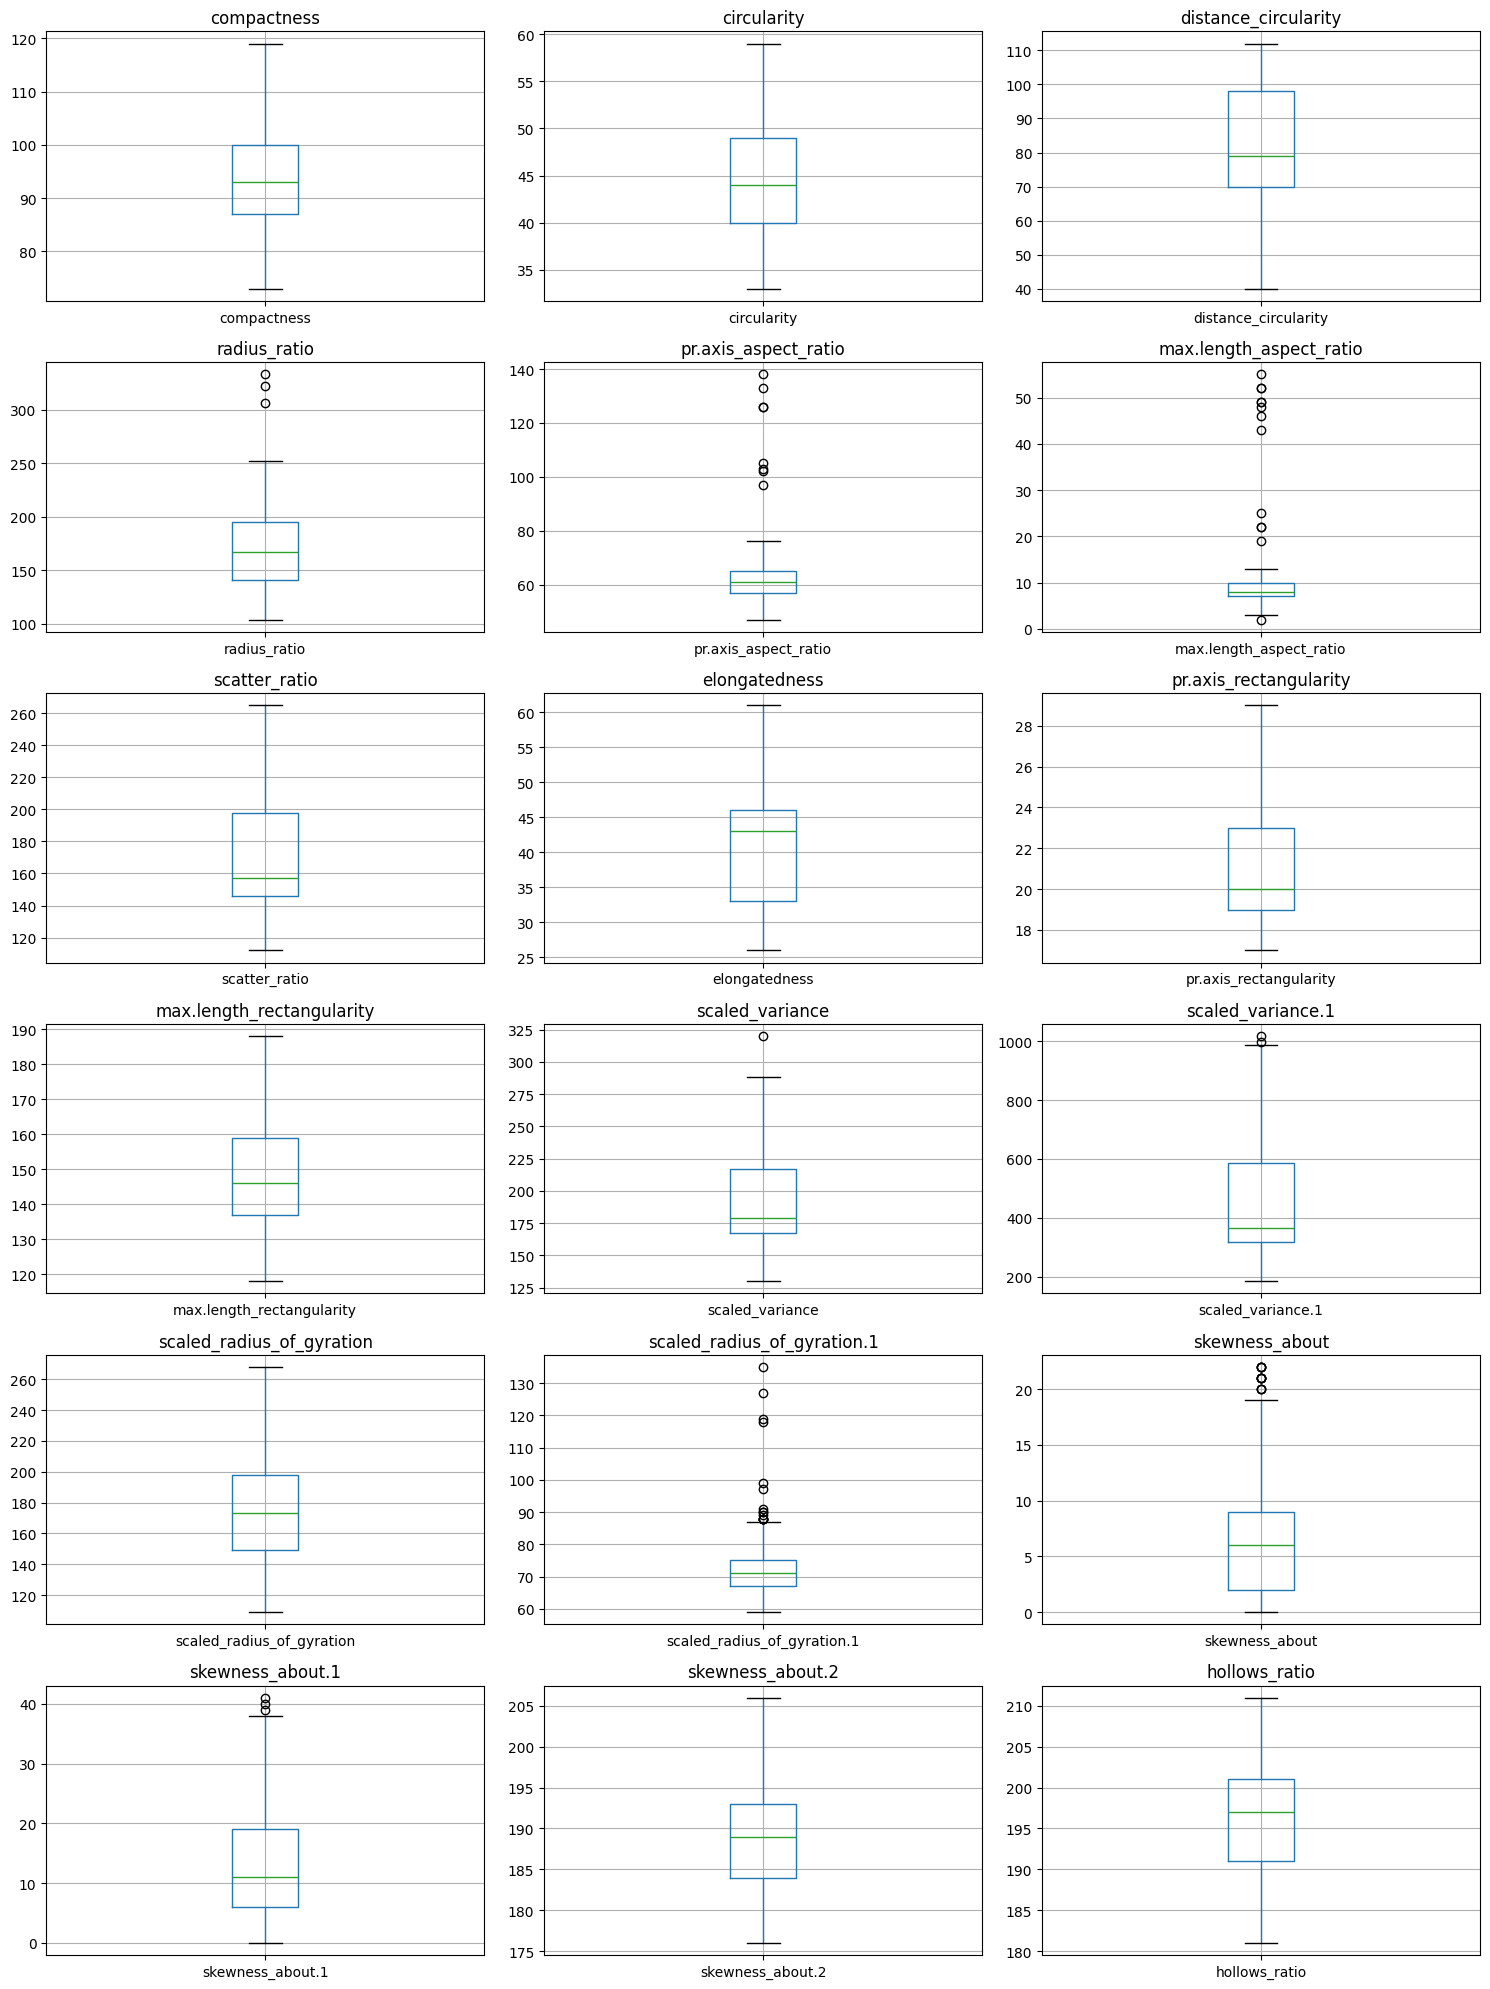

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes.flatten()[i])
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

Iteration über die einzelnen Spalten zur Erstellung kombinierter Visualisierungen.

Verwendung eines Violin-Plots zur Darstellung der Verteilung je Klasse.

Ergänzung durch einen darüberliegenden Strip-Plot, um einzelne Datenpunkte sichtbar zu machen.

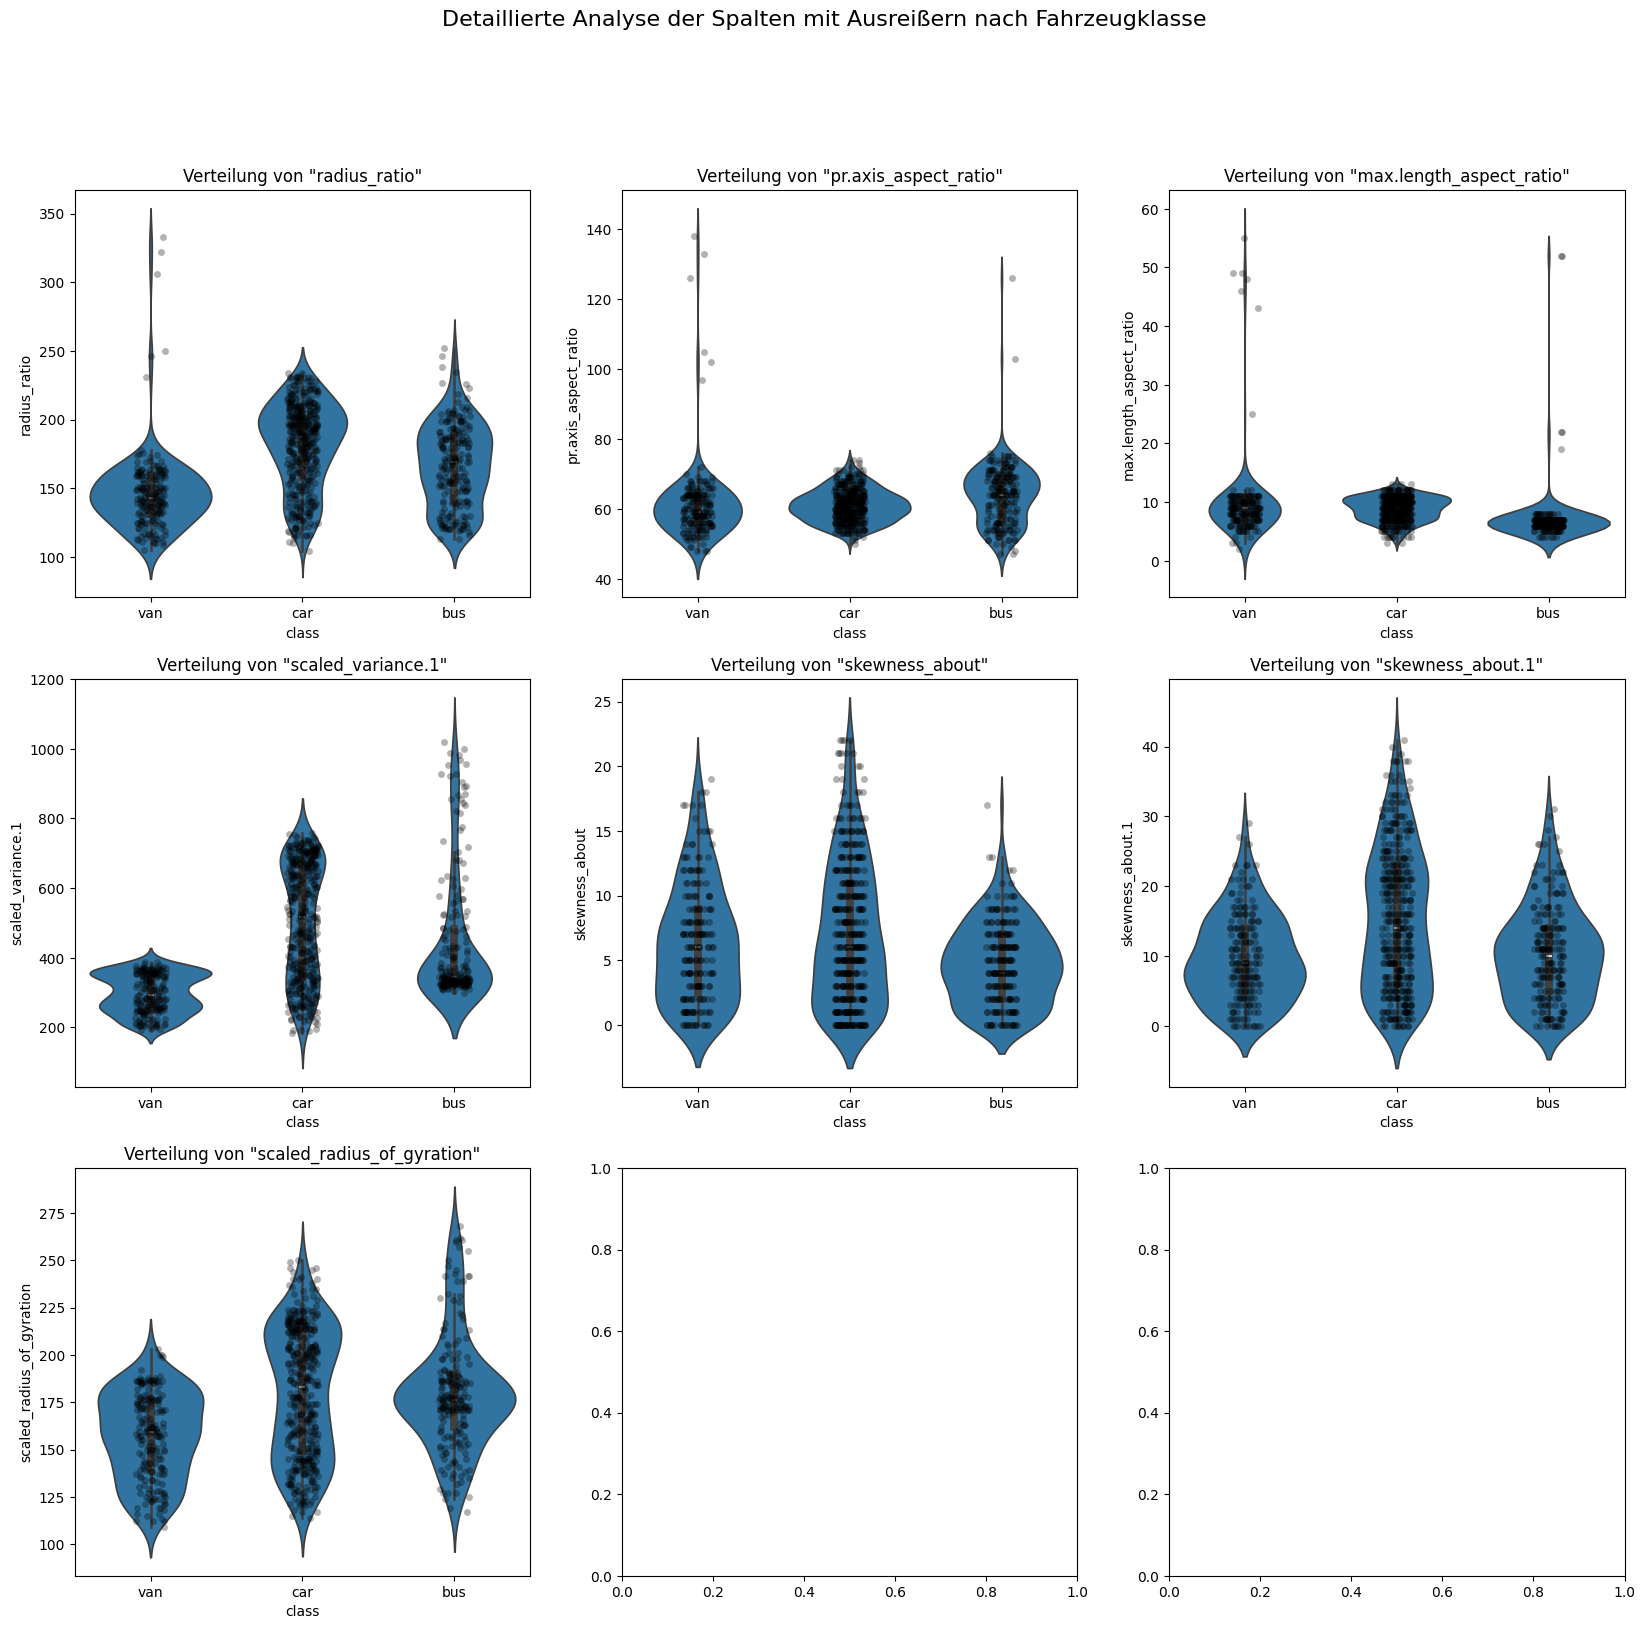

In [ ]:
columns_with_outliers = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance.1', 'skewness_about', 'skewness_about.1', 'scaled_radius_of_gyration']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
fig.suptitle('Detaillierte Analyse der Spalten mit Ausreißern nach Fahrzeugklasse', fontsize=16)


for i, col in enumerate(columns_with_outliers):
    ax = axes.flatten()[i]


    sns.violinplot(x='class', y=col, data=df, ax=ax)

    sns.stripplot(x='class', y=col, data=df, ax=ax, color='black', alpha=0.3, jitter=0.1)

    ax.set_title(f'Verteilung von "{col}"')

plt.show()

Analyse univariater Verteilungen sämtlicher numerischer Merkmale.

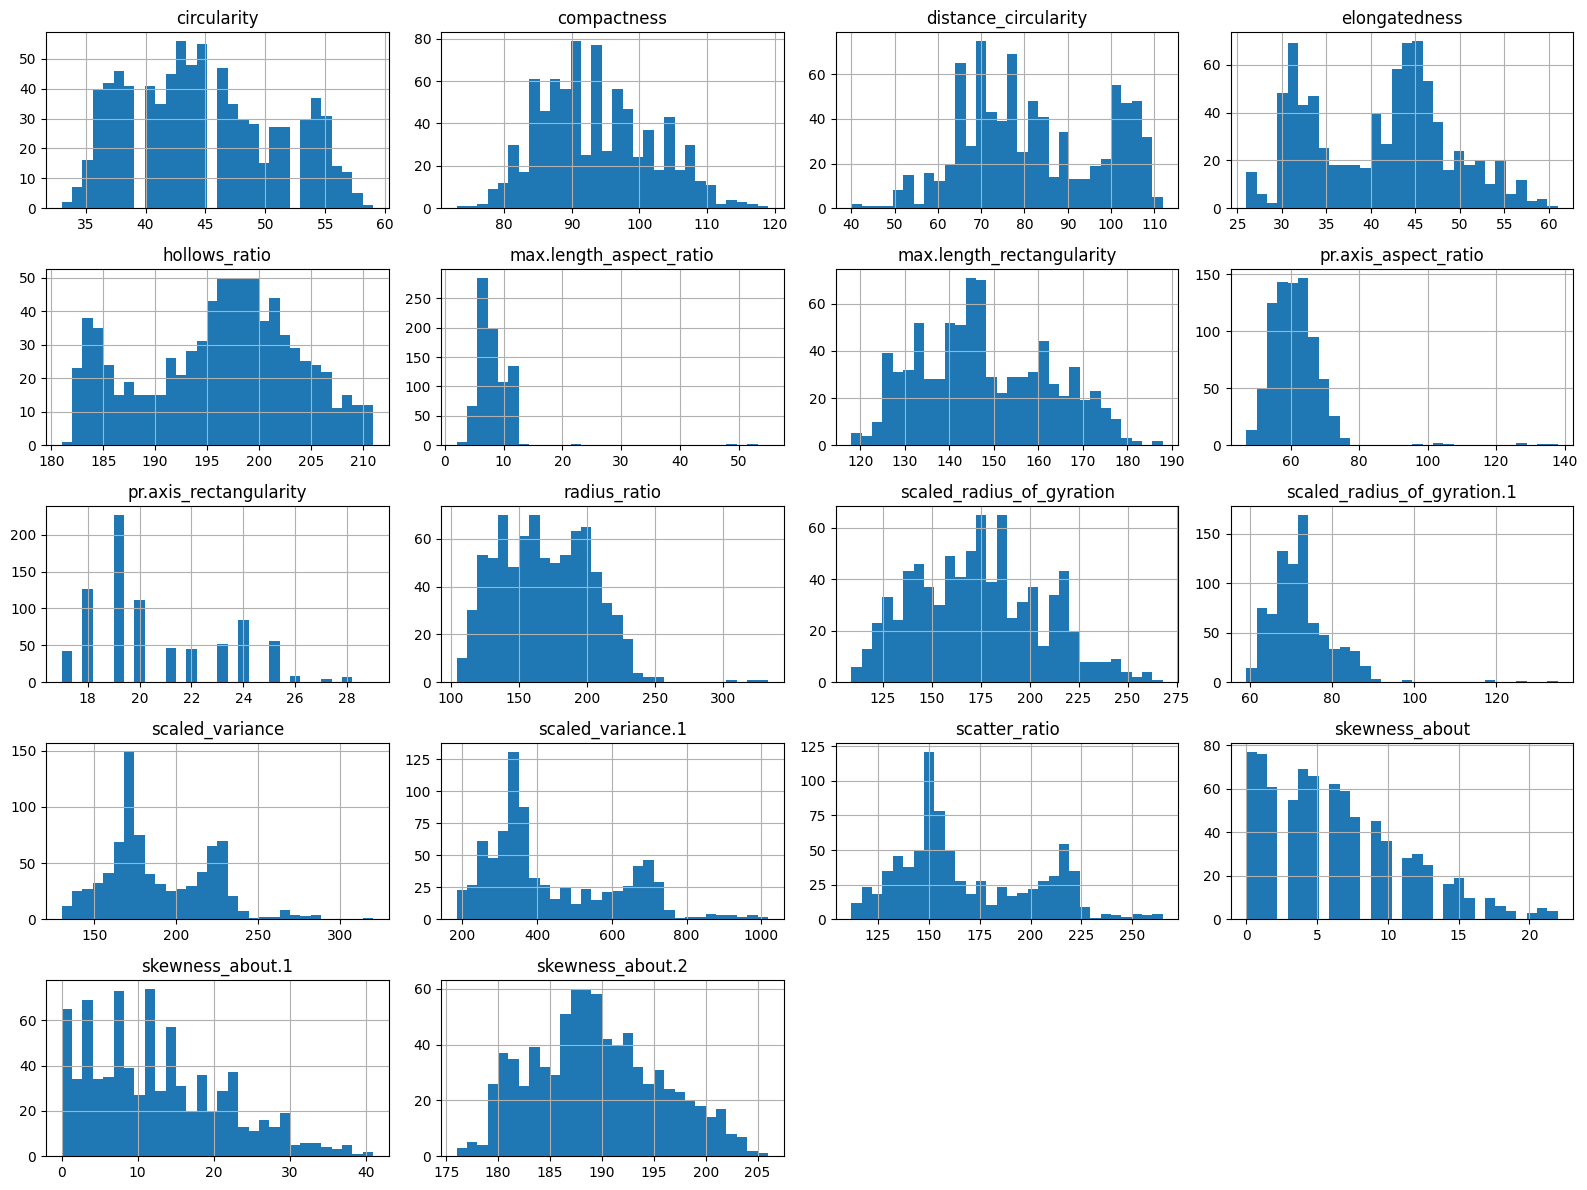

In [ ]:
num_cols = sorted(df.select_dtypes(include='int64').columns)
df[num_cols].hist(figsize=(16,12), bins=30)
plt.tight_layout()

#**4. Vorbereitung des Modells 🆎**

**Normalisierung, Generalisierung, Splitting in Trainings- und Testdatensatz**

In [ ]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,car
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,car
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,car


In [ ]:
X = df.drop('class', axis=1) # Alle Spalten außer der Zielvariable
y = df['class']              # Nur die Zielvariable

Die Daten werden gesplittet: **80% Training, 20% Test**.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaler-Objekt erstellen.

Scaler auf die Trainingsdaten anpassen und diese transformieren.
Den ANGEPASSTEN Scaler auf die Testdaten anwenden.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)

X_test_standardized = scaler.transform(X_test)

#**5. Modell Go-Live 🚴**

Auswahl und Initialisierung des Modells; dabei legt der Parameter n_estimators die Anzahl der Bäume im Random Forest fest (100 als geeigneter Startwert).
Mit random_state wird die Reproduzierbarkeit der Ergebnisse gewährleistet.

Training des Modells auf den vorhandenen Trainingsdaten – in diesem Schritt erfolgt der eigentliche Lernprozess.

Durchführung von Vorhersagen auf den bisher ungesehenen Testdaten.

Erste Validierung: Überprüfung, wie viele der Vorhersagen korrekt getroffen wurden.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_standardized, y_train)

y_pred = model.predict(X_test_standardized)

print(f"Vorhersagen für die ersten 10 Testdaten: {y_pred[:10]}")
print(f"Echte Werte für die ersten 10 Testdaten: {y_test[:10].values}")

Vorhersagen für die ersten 10 Testdaten: ['car' 'car' 'van' 'van' 'van' 'car' 'bus' 'van' 'car' 'bus']
Echte Werte für die ersten 10 Testdaten: ['car' 'car' 'van' 'van' 'van' 'car' 'bus' 'van' 'car' 'bus']


#**6. Bewertung des Modells anhand der Bewertungsmetriken 💹**

Genauigkeit berechnen

Den Classification Report anzeigen. Dieser gibt dir Precision, Recall und F1-Score für jede Klasse.

Die Konfusionsmatrix erstellen und visualisieren.

Visualisierung mit einer Heatmap für bessere Lesbarkeit.

Genauigkeit des Modells: 96.93%

Classification Report:
              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       0.99      0.96      0.97        97
         van       0.91      1.00      0.95        30

    accuracy                           0.97       163
   macro avg       0.96      0.98      0.97       163
weighted avg       0.97      0.97      0.97       163

Konfusionsmatrix:


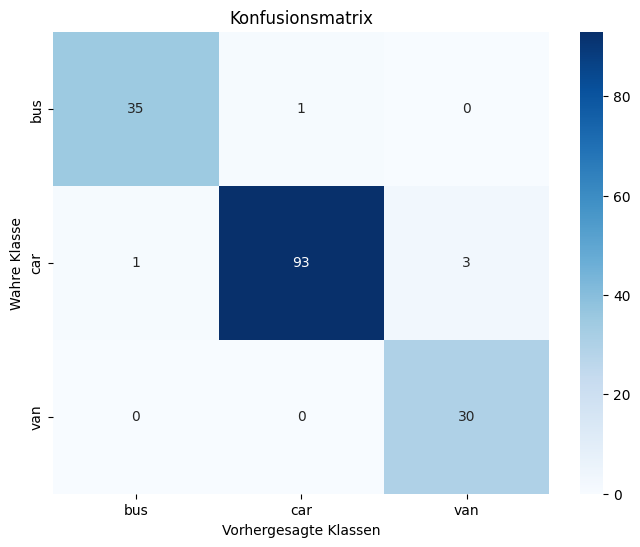

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Modells: {accuracy:.2%}\n") # .2% formatiert es schön in Prozent

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Konfusionsmatrix:")
cm = confusion_matrix(y_test, y_pred)

class_names = ['bus', 'car', 'van']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_names, yticklabels=class_names)
plt.xlabel('Vorhergesagte Klassen')
plt.ylabel('Wahre Klasse')
plt.title('Konfusionsmatrix')
plt.show()

#**Fazit**
Das trainierte Klassifizierungsmodell ist äußerst leistungsfähig und erreicht auf den ungesehenen Testdaten eine Gesamtgenauigkeit von 96.93%. Die Analyse der Konfusionsmatrix und des Classification Reports zeigt, dass das Modell besonders zuverlässig in der Erkennung von Bussen und Vans ist, wobei es jeden einzelnen Van im Datensatz korrekt identifiziert hat (recall = 1.00). Die einzige kleine Schwäche ist eine leichte Tendenz, einige wenige Pkws (car) fälschlicherweise als Bus oder Van zu klassifizieren. Aufgrund der hohen Gesamtleistung und der exzellenten Metriken für alle Fahrzeugklassen ist das Modell sehr gut für den vorgesehenen Klassifizierungszweck geeignet und kann als erfolgreich bewertet werden.